In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, os
from collections import defaultdict

In [2]:
results = {}
for context_length in [1024]:
    for checkpoint in [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]:
        output_dir = f"/home/myang4/TinyZero/evaluate/outputs/context-length-{context_length}-length-curriculum-checkpoint-{checkpoint}/"
        with open(os.path.join(output_dir, "results.pkl"), 'rb') as f:
            results[context_length, checkpoint] = pickle.load(f)

### Plot rewards

In [3]:
def plot(key):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

    for i, context_length in enumerate([1024]):

        x = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]
        difficulty_to_y = defaultdict(list)
        
        for checkpoint in x:
            
            for difficulty, reward in zip(results[context_length, checkpoint]['difficulty'], results[context_length, checkpoint][key]):
                
                difficulty_to_y[difficulty].append(reward)
        
        for difficulty in range(2, 8):
            sns.lineplot(x=x, y=difficulty_to_y[difficulty], label=f"{difficulty} candidates", ax=ax)

        ax.set_title(f"context length = {context_length}")
        ax.set_ylabel(key)
        ax.set_xlabel('gradient steps')
        ax.get_legend().remove()
    
    plt.legend(title='difficulty', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

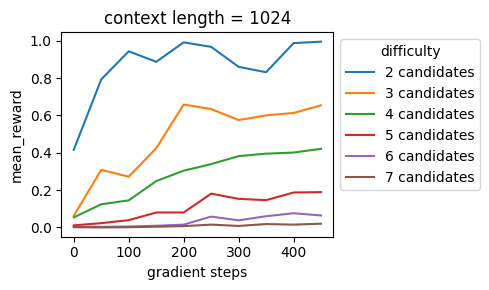

In [4]:
plot('mean_reward')

### Plot lengths

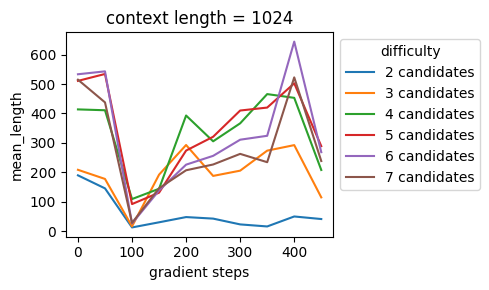

In [5]:
plot('mean_length')

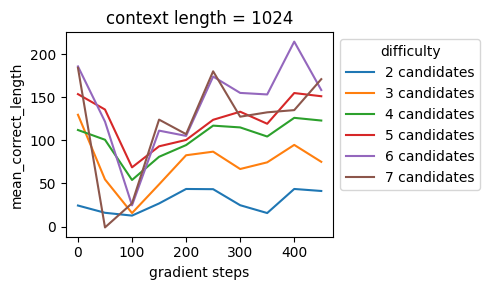

In [6]:
plot('mean_correct_length')

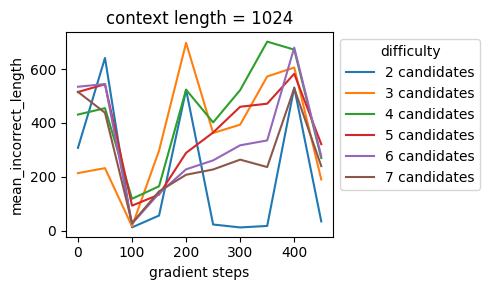

In [7]:
plot('mean_incorrect_length')